In [1]:
import pandas as pd
pd.options.display.max_rows=10
pd.options.display.max_columns=50
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('MainEncodedData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
Unnamed: 0                           1470 non-null int64
Age                                  1470 non-null int64
Attrition                            1470 non-null int64
BusinessTravel                       1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EmployeeCount                        1470 non-null int64
EmployeeNumber                       1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1

In [3]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,...,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,41,1,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,...,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,49,0,2,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,...,1,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,2,37,1,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,3,33,0,2,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,...,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4,27,0,1,591,2,1,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,...,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [10]:
del df['Unnamed: 0']

In [11]:
df.shape

(1470, 51)

In [15]:
import sklearn
from sklearn.cross_validation import train_test_split, cross_val_score
train, test = sklearn.cross_validation.train_test_split(df, train_size = 0.7)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(df.columns[1], axis = 1)
x_test=test.drop(df.columns[1], axis = 1)
y_train=train['Attrition']
y_test=test['Attrition']

For Main Data Set : 1470
For Train Set : 1029
For Test Set : 441


In [8]:
from sklearn import svm

In [16]:
clf = svm.SVC(kernel='linear', C=1) # SVC stands for support vector classification

In [17]:
clf.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
model=clf

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score

pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))

True         0   1
Predicted         
0          371  49
1            8  13
             precision    recall  f1-score   support

          0       0.88      0.98      0.93       379
          1       0.62      0.21      0.31        62

avg / total       0.85      0.87      0.84       441



In [22]:
model.score(x_test,y_test)

0.8707482993197279

ROC AUC: 0.59


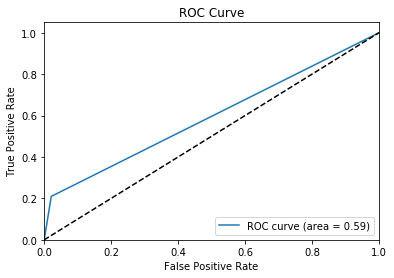

In [26]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
%matplotlib inline
fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [27]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,pred)

0.2606547251389747